Problem 4: White Monster Energy drinks. Do they actually improve performace?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(42)

Setting up the prior:

In [3]:
mu_0 = 5.0  # Prior mean (small effect)
sigma_0 = 10.0  # Prior standard deviation (uncertain)

sigma = 15.0  # variance (performance varies naturally)

true_mu = 12.0  # performance points gained
n_samples = 20  # 20 data points

# Generate data points
# Adding some realistic variability (in real life this would be natural from prior variables like strength, intelligence, reaction time, genetics, etc)
data = np.random.normal(true_mu, sigma, n_samples)

# Ensure reasonable values
data = np.clip(data, -30, 50)

Posterior:

In [4]:
n = len(data)
posterior_var = (sigma**2 * sigma_0**2) / (sigma**2 + n * sigma_0**2)
posterior_mean = (
    (sigma**2 * mu_0 + sigma_0**2 * np.sum(data)) /
    (sigma**2 + n * sigma_0**2)
)
posterior_std = np.sqrt(posterior_var)

print(f"Prior belief: White Monster improves performance by {mu_0} points on average")
print(f"Prior uncertainty (standard dev): {sigma_0} points")
print(f"Sample mean from data: {np.mean(data):.2f} points")
print(f"Posterior belief: White Monster improves performance by {posterior_mean:.2f} points")
print(f"Posterior uncertainty (standard dev): {posterior_std:.2f} points")
print(f"95% credible interval: [{posterior_mean - 1.96*posterior_std:.2f}, {posterior_mean + 1.96*posterior_std:.2f}]")

Prior belief: White Monster improves performance by 5.0 points on average
Prior uncertainty (standard dev): 10.0 points
Sample mean from data: 9.43 points
Posterior belief: White Monster improves performance by 8.98 points
Posterior uncertainty (standard dev): 3.18 points
95% credible interval: [2.75, 15.22]


Visual representations:

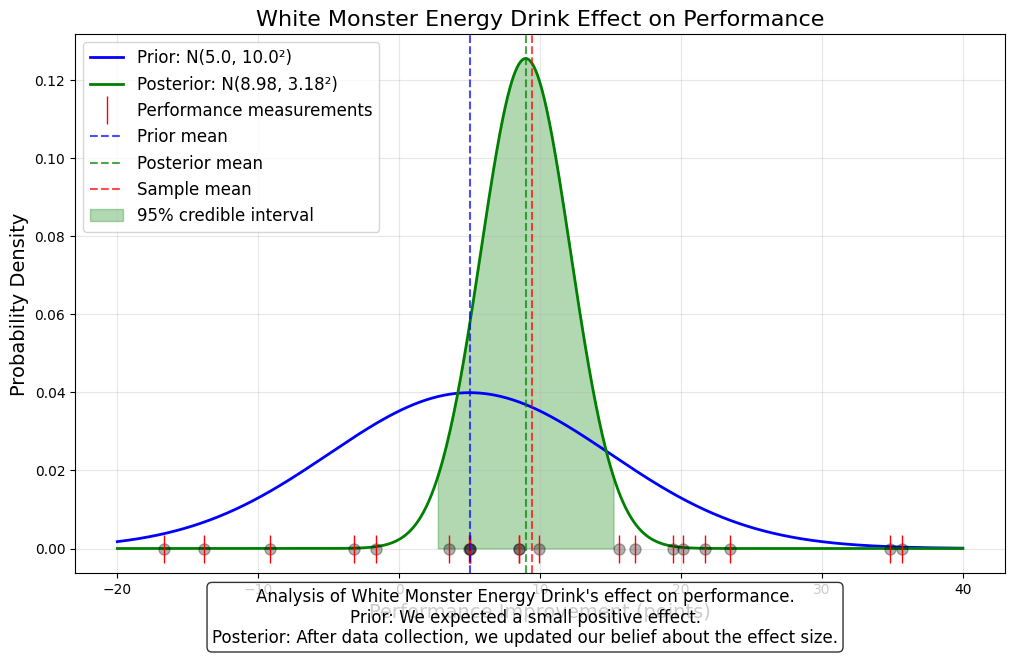

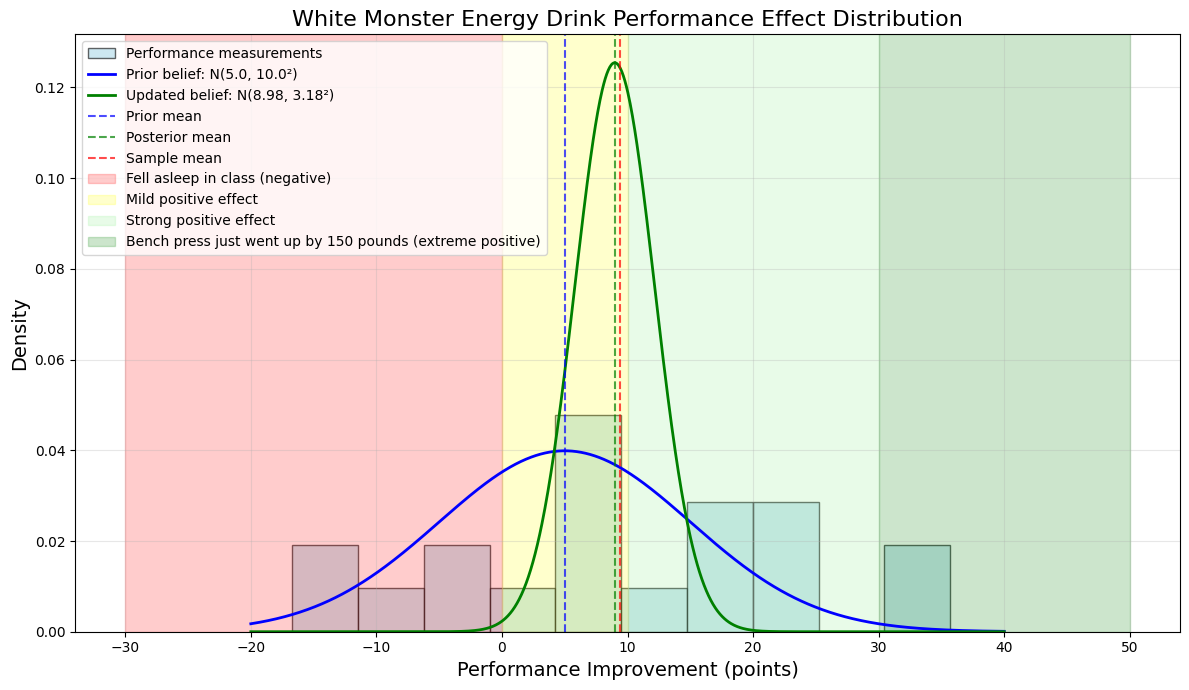

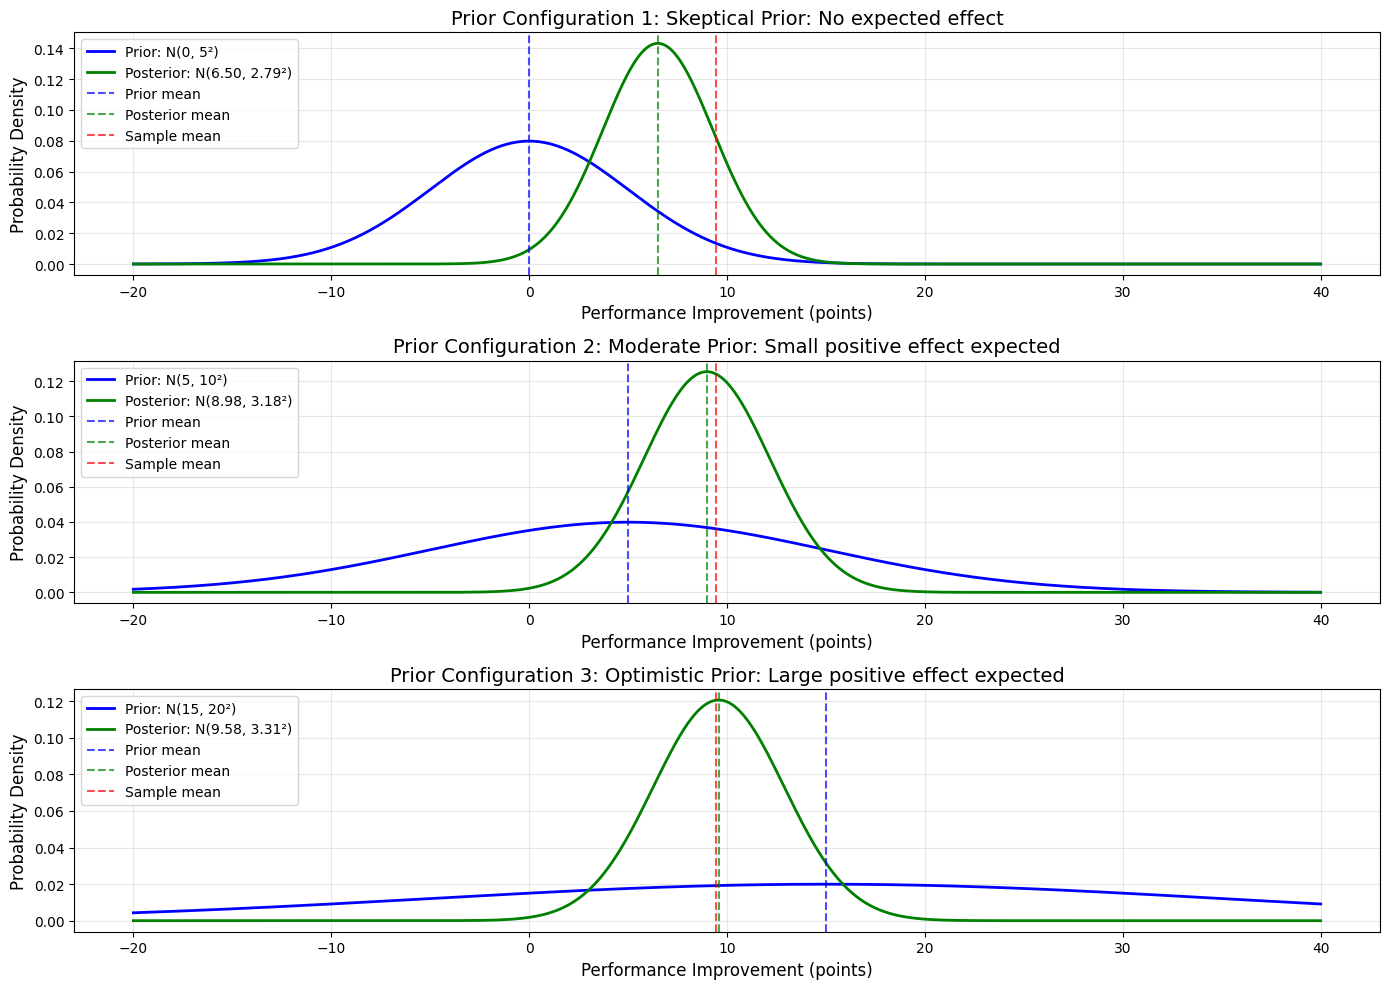

Probability that White Monster has a positive effect: 0.9976 (99.76%)
Probability that White Monster improves performance by at least 10 points: 0.3745 (37.45%)


In [5]:
x = np.linspace(-20, 40, 1000)
prior_pdf = stats.norm.pdf(x, mu_0, sigma_0)
posterior_pdf = stats.norm.pdf(x, posterior_mean, posterior_std)

plt.figure(figsize=(12, 7))

# Plot prior
plt.plot(x, prior_pdf, 'b-', linewidth=2, label=f'Prior: N({mu_0}, {sigma_0}²)')

# Plot posterior
plt.plot(x, posterior_pdf, 'g-', linewidth=2, label=f'Posterior: N({posterior_mean:.2f}, {posterior_std:.2f}²)')

# Plot data points
plt.plot(data, np.zeros_like(data), 'ko', markersize=8, alpha=0.3, label='_nolegend_')
plt.plot(data, np.zeros_like(data), '|', color='red', markersize=20, label='Performance measurements')

# visualize means
plt.axvline(x=mu_0, color='blue', linestyle='--', alpha=0.7, label='Prior mean')
plt.axvline(x=posterior_mean, color='green', linestyle='--', alpha=0.7, label='Posterior mean')
plt.axvline(x=np.mean(data), color='red', linestyle='--', alpha=0.7, label='Sample mean')

# Shade intervials to see things easier
ci_low = posterior_mean - 1.96 * posterior_std
ci_high = posterior_mean + 1.96 * posterior_std
ci_x = np.linspace(ci_low, ci_high, 100)
plt.fill_between(ci_x, stats.norm.pdf(ci_x, posterior_mean, posterior_std),
                 alpha=0.3, color='green', label='95% credible interval')

plt.title('White Monster Energy Drink Effect on Performance', fontsize=16)
plt.xlabel('Performance Improvement (points)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)

# Text to explain graph
plt.figtext(0.5, 0.01,
           "Analysis of White Monster Energy Drink's effect on performance.\n"
           "Prior: We expected a small positive effect.\n"
           "Posterior: After data collection, we updated our belief about the effect size.",
           ha='center', fontsize=12, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add histogram of data
plt.figure(figsize=(12, 7))
plt.hist(data, bins=10, density=True, alpha=0.6, color='lightblue',
         label='Performance measurements', edgecolor='black')
plt.plot(x, prior_pdf, 'b-', linewidth=2, label=f'Prior belief: N({mu_0}, {sigma_0}²)')
plt.plot(x, posterior_pdf, 'g-', linewidth=2, label=f'Updated belief: N({posterior_mean:.2f}, {posterior_std:.2f}²)')

plt.axvline(x=mu_0, color='blue', linestyle='--', alpha=0.7, label='Prior mean')
plt.axvline(x=posterior_mean, color='green', linestyle='--', alpha=0.7, label='Posterior mean')
plt.axvline(x=np.mean(data), color='red', linestyle='--', alpha=0.7, label='Sample mean')

# Define performance zones on the graph for readability
plt.axvspan(-30, 0, alpha=0.2, color='red', label='Fell asleep in class (negative)')
plt.axvspan(0, 10, alpha=0.2, color='yellow', label='Mild positive effect')
plt.axvspan(10, 30, alpha=0.2, color='lightgreen', label='Strong positive effect')
plt.axvspan(30, 50, alpha=0.2, color='green', label='Bench press just went up by 150 pounds (extreme positive)')

plt.title('White Monster Energy Drink Performance Effect Distribution', fontsize=16)
plt.xlabel('Performance Improvement (points)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()

#Exploring different configs
prior_means = [0, 5, 15]
prior_stds = [5, 10, 20]

plt.figure(figsize=(14, 10))

for i, (p_mean, p_std) in enumerate(zip(prior_means, prior_stds)):
    # Calculate posterior for this prior configuration
    post_var = (sigma**2 * p_std**2) / (sigma**2 + n * p_std**2)
    post_mean = (
        (sigma**2 * p_mean + p_std**2 * np.sum(data)) /
        (sigma**2 + n * p_std**2)
    )
    post_std = np.sqrt(post_var)

    # Plot prior and posterior
    prior = stats.norm.pdf(x, p_mean, p_std)
    posterior = stats.norm.pdf(x, post_mean, post_std)

    plt.subplot(3, 1, i+1)
    plt.plot(x, prior, 'b-', linewidth=2, label=f'Prior: N({p_mean}, {p_std}²)')
    plt.plot(x, posterior, 'g-', linewidth=2, label=f'Posterior: N({post_mean:.2f}, {post_std:.2f}²)')
    plt.axvline(x=p_mean, color='blue', linestyle='--', alpha=0.7, label='Prior mean')
    plt.axvline(x=post_mean, color='green', linestyle='--', alpha=0.7, label='Posterior mean')
    plt.axvline(x=np.mean(data), color='red', linestyle='--', alpha=0.7, label='Sample mean')

    # all different prior configs
    if i == 0:
        prior_desc = "Skeptical Prior: No expected effect"
    elif i == 1:
        prior_desc = "Moderate Prior: Small positive effect expected"
    else:
        prior_desc = "Optimistic Prior: Large positive effect expected"

    plt.title(f'Prior Configuration {i+1}: {prior_desc}', fontsize=14)
    plt.xlabel('Performance Improvement (points)', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate the probability that White Monster has a positive effect
prob_positive = 1 - stats.norm.cdf(0, posterior_mean, posterior_std)
print(f"Probability that White Monster has a positive effect: {prob_positive:.4f} ({prob_positive*100:.2f}%)")

# Calculate the probability that White Monster improves performance by at least 10 points
prob_significant = 1 - stats.norm.cdf(10, posterior_mean, posterior_std)
print(f"Probability that White Monster improves performance by at least 10 points: {prob_significant:.4f} ({prob_significant*100:.2f}%)")